### Sequential API, Functional API

#### Sequential API
- 간단한 모델을 구햔하기에 적합하며, 단순하게 층을 쌓는 방식으로 쉽고 간단하게 사용할 수 있다.
- 단일 입력 및 출력만 있기 때문에, 레이어를 공유하거나 여러 입력 또는 출력을 가질 수 있는 모델은 생성할 수 없다.

#### Functional API
- Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있다.
- 여러 개의 입력 또는 출력을 가지는 모델을 구현하거나 층 간의 연결 및 연산을 수행하는 모델 구현 시 사용한다.

#### 성능 평가
<img src='./images/validation.png' width='700px' style='margin-left: 0;'>

In [26]:
from tensorflow.keras.datasets import fashion_mnist

# keras 데이터 세트에서 train, target 데이터 불러오기
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

# train, target 데이터의 shape 출력
# 입력 - 3차원, 출력 - 1차원
print("train dataset shape: ", train_images.shape, train_targets.shape)
print("test dataset shape: ", test_images.shape, test_targets.shape)

train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


In [27]:
import numpy as np

# 이미지 값을 0 ~ 1 사이의 값으로 바꿔주는 함수
# 원래 값이 0 ~ 255이므로, 255로 나눠주면 0 ~ 1 사이의 값을 가진다.
def get_processed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

In [28]:
# 데이터 세트에 위 함수 적용 후 shape 출력
train_images, train_targets = get_processed_data(train_images, train_targets)
test_images, test_targets = get_processed_data(test_images, test_targets)

print("train dataset shape: ", train_images.shape, train_targets.shape)
print("test dataset shape: ", test_images.shape, test_targets.shape)

train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


In [29]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

# 입력 데이터가 28 * 28이므로 size를 28로 설정
INPUT_SIZE = 28

# 입력, 은닉, 출력층을 전부 Dense Layer라고 부른다
# 학습 데이터가 많으면 neuron의 개수를 더 많이 지정하거나 (ex. 64, 128, 256, ...)
# 은닉층 개수를 더 늘리면 된다.
# 학습 데이터가 적으면 neuron의 개수 또는 은닉층 수를 줄이는 것이 좋다.
model = Sequential([
    # 전체 (28 * 28 = 784개) feature로 flatten 진행
    # 첫 번째 Input Layer
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),

    # 두 번째 Hidden Layer (relu 활성화 함수 사용)
    Dense(64, activation='relu'),

    # 세 번째 Dense Layer (relu 활성화 함수 사용)
    Dense(128, activation='relu'),

    # 마지막 Output Layer (다중 분류이기 때문에 Softmax 활성화 함수 사용)
    Dense(10, activation='softmax')
])

# 파라미터 수 = 입력 뉴런 수 * 출력 뉴런 수 + 출력 뉴런 수
# 이 파라미터 수에는 편향(bias) 파라미터도 포함되어야 하고
# 편향은 각 출력 뉴헌에 더해지는 추가적인 파라미터 수다.
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# optimizer, loss function을 설정한 모델 생성
# 변수에 따로 담아두지 말 것
model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [31]:
from tensorflow.keras.utils import to_categorical

# target 데이터 원핫 인코딩
train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [32]:
# 모델 훈련과 동시에 각 epoch 별 정확도와 loss 이력을 ndarray에 저장
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7609 - loss: 0.6981
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8600 - loss: 0.3860
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8739 - loss: 0.3482
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8850 - loss: 0.3125
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8884 - loss: 0.2977
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.8940 - loss: 0.2878 
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8980 - loss: 0.2737
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9059 - loss: 0.2558
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9059 - loss: 0.2490
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9079 - loss: 0.2420
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9119 - loss: 0.2345
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 994us

In [12]:
# 각 epoch 별 loss와 정확도 이력을 출력
print(history.history['loss'])
print('=' * 80)
print(history.history['accuracy'])

[0.5352901220321655, 0.3891158401966095, 0.3490593135356903, 0.32590311765670776, 0.3071543872356415, 0.29249462485313416, 0.28230029344558716, 0.271431028842926, 0.2601432502269745, 0.25176626443862915, 0.2430194467306137, 0.23721164464950562, 0.22904829680919647, 0.2232741415500641, 0.21659035980701447, 0.2113422006368637, 0.20639774203300476, 0.1986382007598877, 0.1969207525253296, 0.1905352920293808]
[0.8124333620071411, 0.859250009059906, 0.8723833560943604, 0.8804000020027161, 0.8872166872024536, 0.8922833204269409, 0.8954166769981384, 0.8980000019073486, 0.9024333357810974, 0.9065499901771545, 0.9101333618164062, 0.9104999899864197, 0.9140666723251343, 0.9159500002861023, 0.9182833433151245, 0.9200999736785889, 0.9224333167076111, 0.9244499802589417, 0.92535001039505, 0.9278333187103271]


In [18]:
# 입출력의 차원 수를 맞춰주기 위해 맨 앞에 차원 하나 추가
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [17]:
# 모델로 test 데이터 예측
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print(pred_proba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[3.5363509e-10 1.3396077e-10 5.0168675e-10 2.7954968e-08 4.2151321e-12
  9.5605355e-05 6.3416453e-11 7.3924083e-03 4.4558435e-10 9.9251199e-01]]


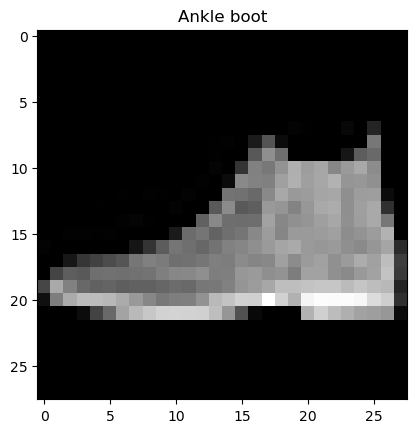

In [35]:
import matplotlib.pyplot as plt

# 이미지 클래스 명
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(class_names[pred_prob.flatten().argsort()[::-1][0]])

# 위에서 예측한 이미지(test_images[0])를 출력하고
# 이미지의 클래스 중 예측 이미지에 적합할 확률이 가장 높은 클래스 명을 출력한다
# 이 이미지는 Ankle boot일 확률이 제일 높다
plt.imshow(test_images[0], cmap='gray')
plt.title(class_names[pred_proba.flatten().argsort()[::-1][0]])
plt.show()

In [37]:
# 모델 성능 평가 - 현재 모델의 정확도는 약 0.88, loss는 약 0.37
# batch size는 model을 fit했을 때와 동일하게 맞출 것
model.evaluate(test_images, test_oh_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8853 - loss: 0.3712


[0.36779236793518066, 0.883400022983551]

### Validation

In [38]:
from tensorflow.keras.datasets import fashion_mnist

# keras 데이터 세트에서 train, target 데이터 불러오기
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print("train dataset shape: ", train_images.shape, train_targets.shape)
print("test dataset shape: ", test_images.shape, test_targets.shape)

train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


In [39]:
import numpy as np

# 이미지 값을 0 ~ 1 사이의 값으로 바꿔주는 함수
# 원래 값이 0 ~ 255이므로, 255로 나눠주면 0 ~ 1 사이의 값을 가진다.
def get_processed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

In [40]:
# 데이터 세트에 위 함수 적용 후 shape 출력
train_images, train_targets = get_processed_data(train_images, train_targets)
test_images, test_targets = get_processed_data(test_images, test_targets)

print("train dataset shape: ", train_images.shape, train_targets.shape)
print("test dataset shape: ", test_images.shape, test_targets.shape)

train dataset shape:  (60000, 28, 28) (60000,)
test dataset shape:  (10000, 28, 28) (10000,)


In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# train 데이터에서 validation 데이터 분리 (기존 train 데이터의 20%)
train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

# target 데이터 원핫 인코딩
train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

# 현재 train과 validation 데이터의 shape 출력
print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [42]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

# Sequential API로 모델 층 생성
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 모델 컴파일링
model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# 모델 훈련과 동시에 train, validation 데이터의 정확도 및 loss 이력을 ndarray에 저장
# verbose=2: 각 epoch 별 정보를 함축적으로 출력 
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1500/1500 - 2s - 1ms/step - acc: 0.8146 - loss: 0.5232 - val_acc: 0.8585 - val_loss: 0.3980
Epoch 2/20
1500/1500 - 1s - 974us/step - acc: 0.8596 - loss: 0.3844 - val_acc: 0.8578 - val_loss: 0.3862
Epoch 3/20
1500/1500 - 1s - 943us/step - acc: 0.8735 - loss: 0.3466 - val_acc: 0.8733 - val_loss: 0.3445
Epoch 4/20
1500/1500 - 1s - 901us/step - acc: 0.8791 - loss: 0.3249 - val_acc: 0.8739 - val_loss: 0.3432
Epoch 5/20
1500/1500 - 1s - 939us/step - acc: 0.8871 - loss: 0.3049 - val_acc: 0.8798 - val_loss: 0.3279
Epoch 6/20
1500/1500 - 1s - 941us/step - acc: 0.8905 - loss: 0.2929 - val_acc: 0.8842 - val_loss: 0.3172
Epoch 7/20
1500/1500 - 1s - 938us/step - acc: 0.8952 - loss: 0.2770 - val_acc: 0.8884 - val_loss: 0.3058
Epoch 8/20
1500/1500 - 1s - 901us/step - acc: 0.9005 - loss: 0.2655 - val_acc: 0.8887 - val_loss: 0.3026
Epoch 9/20
1500/1500 - 1s - 902us/step - acc: 0.9012 - loss: 0.2605 - val_acc: 0.8854 - val_loss: 0.3177
Epoch 10/20
1500/1500 - 1s - 898us/step - acc: 0.9057 - l

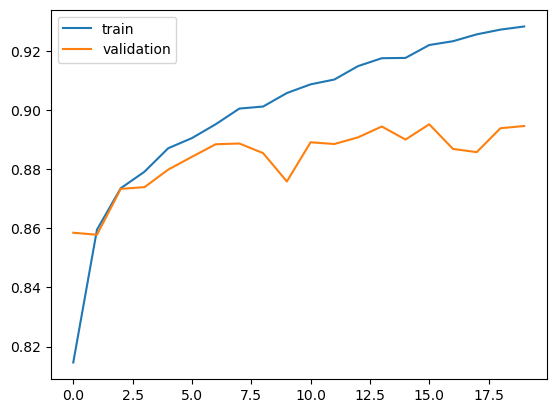

In [45]:
import matplotlib.pyplot as plt

# 각 epoch 별 train과 validation 데이터의 정확도 변화를 시각화
# train 데이터의 정확도가 가장 높은 지점 이후로 validation과의 차이가 벌어지는 것을 확인
# 이는 해당 지점부터 과적합이 발생했다는 의미로, 다음 학습 시에는 해당 지점 이전까지만 epoch를 돌려야 한다
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[9.7431235e-05 4.0794166e-08 9.2405689e-01 4.8714969e-06 1.3047742e-02
  2.3086596e-07 6.2792785e-02 3.4976816e-14 1.0164799e-08 1.5791472e-10]]


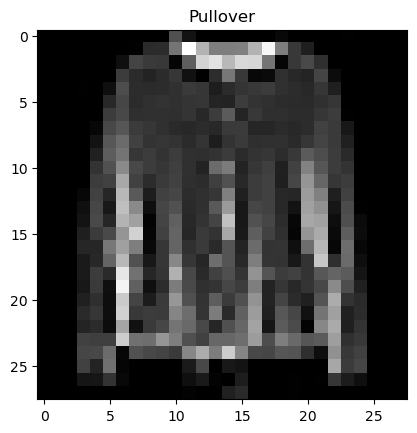

In [47]:
import matplotlib.pyplot as plt

# 이미지 클래스 명
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 새로운 모델로 test 데이터 예측 후 각 클래스 별 확률 출력
pred_prob = model.predict(np.expand_dims(test_images[25], axis=0))
print(pred_prob)

# 위에서 예측한 이미지를 시각화하고, 이미지 클래스 중 가장 확률이 높은 클래스 명을 제목으로 출력
# 현재 이미지는 Pullover일 확률이 가장 높다
plt.imshow(test_images[25], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()

In [49]:
# 모델 성능 테스트
# 이전 모델보다 성능이 소폭 감소
model.evaluate(test_images, test_oh_targets, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - acc: 0.8830 - loss: 0.3613


[0.3669171631336212, 0.8830000162124634]

#### Functional API 

In [50]:
# call 함수
class Test:
    def __call__(self, data):
        return data + 10

# 1. Test()로 클래스 객체를 호출하면 __call__ 메소드가 호출됨
# 2. 호출된 __call__ 메소드에 Test()뒤 괄호 안 인자 전달
# 3. 따라서 __call__ 메소드에 20이 전달되므로, 30이 출력된다.
print(Test()(20))

30


In [51]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

# 딥러닝 모델 생성 함수 선언
def create_model():
    # 입력값의 shape를 28 * 28로 선언하고 input_tensor에 할당
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))

    # input_tensor를 Flatten하여 x에 할당
    x = Flatten()(input_tensor)

    # x값을 Dense에 입력하고, 출력 결과는 다음 Dense에 인자로 할당
    # 결과적으로는 이번 출력이 다음 번의 입력이 된다
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    # 마지막 출력층에서는 Softmax(다중 분류) 활성화 함수를 거쳐 output에 할당
    output = Dense(10, activation='softmax')(x)

    # input_tensor를 입력으로, output을 출력으로 가지는 모델을 반환
    model = Model(inputs=input_tensor, outputs=output)
    return model

In [53]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np

# image 값을 0 ~ 1 사이의 값으로 변환(MinMaxScaling)하는 함수 
def get_processed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    # 값이 변환된 images와 target을 반환
    return images, targets


# target 데이터를 원핫 인코딩 해주는 함수
def get_preprocessed_ohe(images, targets):
    # 원핫 인코딩 전, 위의 함수로 images 값 조정
    images, targets = get_processed_data(images, targets)

    # target 데이터 원핫 인코딩
    oh_targets = to_categorical(targets)

    # 값이 조정된 images와 원핫 인코딩 된 target 데이터 반환
    return images, oh_targets


# train 데이터와 validation 데이터를 분리해주는 함수
# train_test_split에 들어가는 파라미터 값을 함수 인자로 조정
def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    # train, test 데이터에 위 함수 적용 (images 값 조정, target 원핫 인코딩)
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    # train 데이터에서 validaton 데이터 분리
    train_images, validation_images, train_oh_targets, validation_oh_targets = \
        train_test_split(train_images, train_oh_targets, stratify=train_oh_targets,
                         test_size=validation_size, random_state=random_state)

    # train, test, validation 데이터 반환
    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [55]:
from tensorflow.keras.datasets import fashion_mnist

# fashion 데이터 불러오기
(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

# 위 함수를 사용해서 train, validation, test 데이터 생성
# images MinMaxScaling → target 원핫 인코딩 → validation 데이터 분리
(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
                                            get_train_valid_test(train_images, train_targets, test_images, test_targets)

# train, validation, test 데이터 shape 출력
print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [56]:
# 모델 생성 후 각 layer의 파라미터 출력
model = create_model()
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# 모델 컴파일링
model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [58]:
# 모델 훈련과 동시에 각 epoch 별 train, validation 데이터의 정확도와 loss 이력을 ndarray에 저장
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7307 - loss: 0.7521 - val_acc: 0.8518 - val_loss: 0.4204
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8557 - loss: 0.4072 - val_acc: 0.8620 - val_loss: 0.3774
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8710 - loss: 0.3579 - val_acc: 0.8568 - val_loss: 0.3771
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8785 - loss: 0.3382 - val_acc: 0.8686 - val_loss: 0.3630
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8825 - loss: 0.3181 - val_acc: 0.8788 - val_loss: 0.3304
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8868 - loss: 0.2999 - val_acc: 0.8737 - val_loss: 0.3391
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8953 - loss: 0.2852 - val_acc: 0.8836 - val_loss: 0.3192
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8992 - loss: 0.2723 - val_acc: 0.8843 - val_loss: 0.3179
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - ac

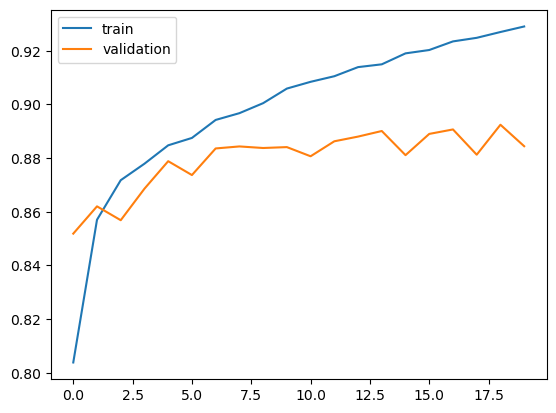

In [59]:
import matplotlib.pyplot as plt

# 모델의 각 epoch 별 train과 validation 데이터에 대한 예측 정확도 변화를 시각화하는 함수
def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

# 함수 사용
show_history(history)

In [60]:
# 모델로 test 이미지 예측
# 맨 앞에 차원 하나 추가해서 입력이랑 차원 수 맞추기
pred_prob = model.predict(np.expand_dims(test_images[8500], axis=0))
print(pred_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.7958261e-04 5.9965900e-11 9.9909031e-01 2.2432745e-07 1.3206454e-04
  9.0739655e-12 5.9736171e-04 3.5535024e-13 3.7162800e-07 1.2767457e-14]]


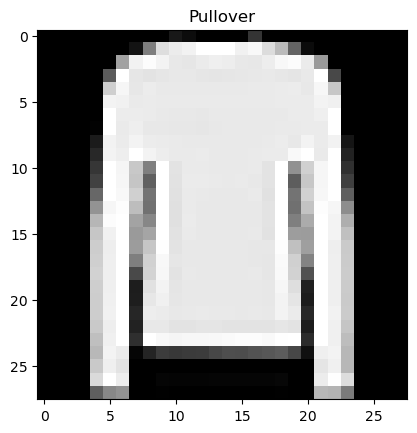

In [62]:
import matplotlib.pyplot as plt

# 이미지 클래스 명
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 위에서 예측한 이미지를 시각화하고, 이미지 클래스 중 가장 확률이 높은 클래스 명을 제목으로 출력
# 현재 이미지는 Pullover일 확률이 가장 높다
plt.imshow(test_images[8500], cmap='gray')
plt.title(class_names[pred_prob.flatten().argsort()[::-1][0]])
plt.show()